In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dense, Flatten, Dropout, MaxPool2D
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model
import pydot

In [35]:
batch_size = 64
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)

In [36]:
data = pd.read_csv('/home/parth/Downloads/all/train.csv', sep=',')

data = data.reindex(np.random.permutation(data.index))

labels = data['label']
labels = np.array(labels)
features = data.loc[:, 'pixel0':'pixel783']
features = np.array(features)

# change dimension
features = np.reshape(features, (-1, 28, 28, 1))

# labels to one hot-encoding
one_hot_labels = utils.to_categorical(labels, num_classes=num_classes)

# data partitaioning
X_train = features[:38000]
X_val = features[38000:]
Y_train = one_hot_labels[:38000]
Y_val = one_hot_labels[38000:]

# test data preprocessing
test_features = pd.read_csv('/home/parth/Downloads/all/test.csv', sep=',')
test_features = np.array(test_features)
X_test = np.reshape(test_features, (-1, 28, 28, 1))

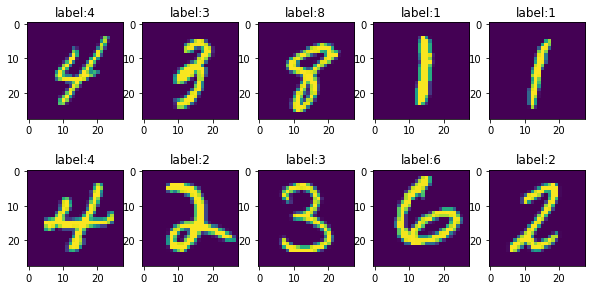

In [37]:
plt.figure(figsize=(10, 10))

plt.subplots_adjust(top=0.5)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('label:{}'.format(labels[i]))
    plt.imshow(X_train[i].reshape(28, 28))

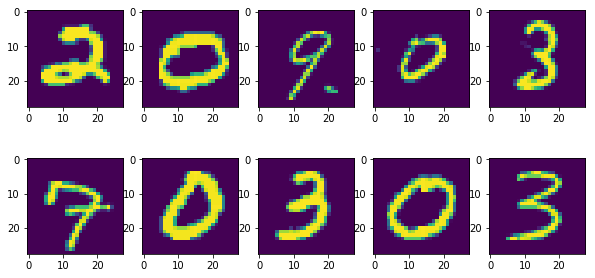

In [21]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.5)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))

In [38]:
model = Sequential()

model.add(Conv2D(32, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=4, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# model compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) 
        zoom_range=0.1,  # Randomly zoom image 
        width_shift_range=0.1, 
        height_shift_range=0.1)  


In [40]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [27]:
history = model.fit_generator(datagen.flow(X_train, 
                                           Y_train, 
                                           batch_size=batch_size),      
                              epochs=epochs, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              validation_data=(X_val, Y_val), 
                              callbacks=[annealer], verbose=1)
max(history.history['acc'])

Epoch 1/50
593/593 [==============================] - 31s 52ms/step - loss: 0.0632 - acc: 0.9808 - val_loss: 0.0520 - val_acc: 0.9855
Epoch 2/50
593/593 [==============================] - 31s 53ms/step - loss: 0.0583 - acc: 0.9828 - val_loss: 0.0262 - val_acc: 0.9928
Epoch 3/50
593/593 [==============================] - 34s 57ms/step - loss: 0.0501 - acc: 0.9848 - val_loss: 0.0212 - val_acc: 0.9952
Epoch 4/50
593/593 [==============================] - 33s 56ms/step - loss: 0.0503 - acc: 0.9845 - val_loss: 0.0411 - val_acc: 0.9898
Epoch 5/50
593/593 [==============================] - 33s 56ms/step - loss: 0.0481 - acc: 0.9857 - val_loss: 0.0204 - val_acc: 0.9942
Epoch 6/50
593/593 [==============================] - 90s 152ms/step - loss: 0.0441 - acc: 0.9866 - val_loss: 0.0195 - val_acc: 0.9942
Epoch 7/50
593/593 [==============================] - 36s 61ms/step - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0227 - val_acc: 0.9938
Epoch 8/50
593/593 [==============================] - 69s 116

0.9960986925347954

In [56]:
model.save('CNN_model')
results = model.predict(X_test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results], axis=1)
submission.to_csv("/home/parth/Downloads/all/Digit_predict2.csv", index=False)


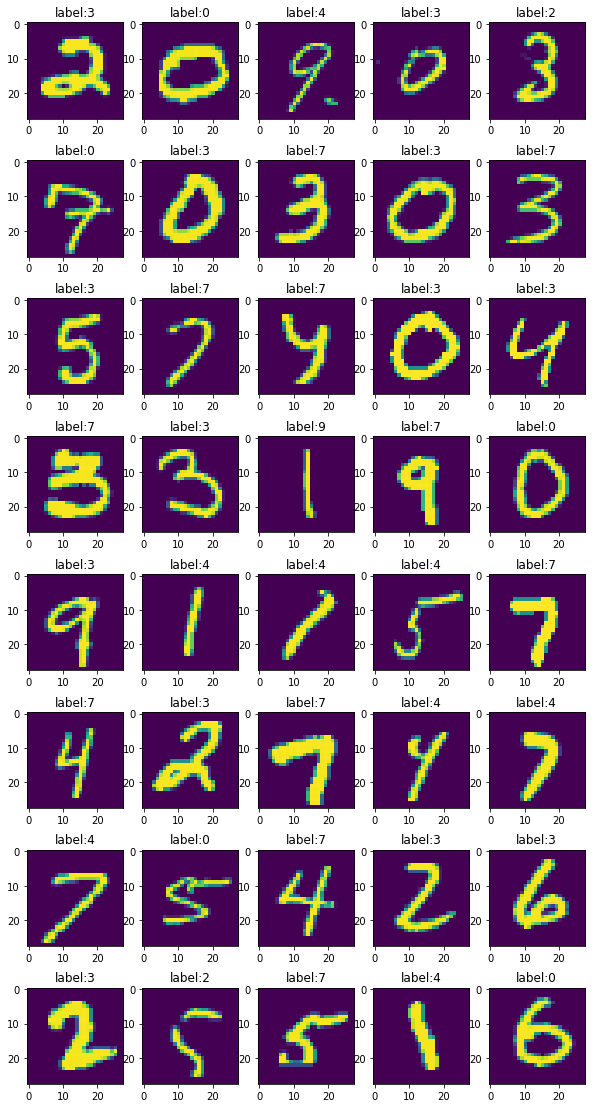

In [48]:
plt.figure(figsize=(10,40))
plt.subplots_adjust(top=0.5)
for i in range(40):
    plt.subplot(8, 5, i + 1)
    plt.title('label:{}'.format(results[i]))
    plt.imshow(X_test[i].reshape(28, 28))